In [1]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


In [ ]:
#La descripción de las variables puede ser encontrada en:
#https://docs.google.com/spreadsheets/d/1seSDd6qGugEBULL_60W4h2Aicj8C3oyKDKbVfUPh2Sc/edit#gid=0

In [2]:
#leer la base de datos
df = pd.read_stata('../SABE.dta')

In [3]:
for col in df.columns:
    print(col)

id
p104
p112
p113_1
p113_2
p114_1
p114_2
estrato_2
p117
regionut
pam
p121
p122edad
p122mes
p122anio
p124
p125
p126ar
p126mesa
p126per
p126rep
p126
p127r9
p127r7
p127r5
p127r3
p127r1
p127
p128tpd
p128dm
p128ps
p128
p129ar
p129mesa
p129per
p129
p130
minmenpam
p131
p132
p132a
edadproxi
generoproxi
p133_p133t2_1
p133_p133t2_2
p133_p133t2_3
p133_p133t2_4
p133
p134ar
p134mesa
p134per
p134rep
p134
p135r9
p135r7
p135r5
p135r3
p135r1
p135
p136tpd
p136dm
p136ps
p136
p137ar
p137mesa
p137per
p137
p138
minmenpro
p139_1
p139_2
p139_3
p139_4
p139_5
p139_6
p139_7
p139cual
p139a
p140
p141
p141a_1
p141a_2
p141a_3
p141a_4
p141a_5
p141a_8
p141a_9
p141b_1
p141b_2
p141b_3
p141b_4
p141b_5
p141b_6
p141b_8
p141b_9
p142
p142a
p142b
p142bcual
p201
p202
p203
p204
p205
p205si
p205cual
p206
p207
p208
p209
p226
p227
p228
p229
p229cual
p230
p230a
p231
p232
p233
p234
p235
p235cual
p236
p237_1
p237_2
p237_3
p237_4
p237_5
p237_6
p237_7
p237_8
p238
p239_1
p239_2
p239_3
p239_4
p239_5
p239_6
p239_7
p240
p241
p242_1
p242_2


In [4]:
df['mental_disease'].value_counts()

No mental disease    21616
Mental disease        2013
Name: mental_disease, dtype: int64

In [5]:
df['cogtotal']

0        27.0
1        24.0
2        23.0
3        29.0
4        28.0
         ... 
23689    30.0
23690    30.0
23691    30.0
23692    30.0
23693    30.0
Name: cogtotal, Length: 23694, dtype: float32

In [6]:
#Columna de rendimiento cognitivo
df['cogcat_folstein'].value_counts()

Normal        17678
Impaired       4717
Borderline     1299
Name: cogcat_folstein, dtype: int64

In [7]:
# cambiar entradas 77 por 7 - trabajo de profesional independiente
df['p229'].replace(77, 7, inplace =True)

In [8]:
#Cambiar valores categoricos de minimental por numéricos
df['cogcat_folstein'].replace({'Normal':1, 'Impaired':2,'Borderline':3}, inplace=True)


In [9]:
df['cogcat_folstein'].value_counts()

1    17678
2     4717
3     1299
Name: cogcat_folstein, dtype: int64

In [10]:
col_to_del = ['diabetes','cancer','copd','osteoporosis','peso']
#eliminar columnas para que no hayan duplicados
for col in col_to_del:
    df.drop([col], axis=1, inplace= True)

In [11]:
#Crear columna test depresion basado en respuestas de columnas previas
cols =['p614','p615','p616','p617','p618','p619','p620','p621','p622','p623','p624','p625']
df['test_depresion'] = df[cols].sum(axis=1) 

In [12]:
df['p614'].value_counts()

1    18144
0     4690
2      860
Name: p614, dtype: int64

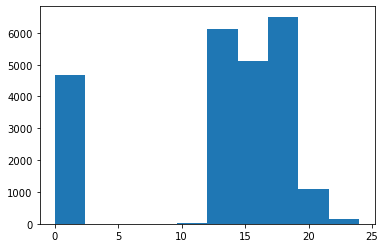

In [13]:
plt.hist(df['test_depresion'])
plt.show()

In [14]:
df['test_depresion'].max()

24

In [15]:
def depresion(valor):
        if valor>=19: 
            return 3 #Depresion
        elif 10 < valor and  valor < 19:
            return 2 #Depresion leve
        elif  valor<=10:
            return 1 #Sin depresion
    

In [16]:
df['tiene_depresion'] = df['test_depresion'].map(depresion)

In [17]:
df['tiene_depresion'].value_counts()

2    15973
1     4705
3     3016
Name: tiene_depresion, dtype: int64

In [18]:
#Creación de columna Barthel basado en respuestas a preguntas anteriores
cols = ['p701','p702','p703','p704','p705','p706','p707','p708','p709','p710']
df['barthel'] =  df[cols].sum(axis=1)  

In [19]:
def nivel_dependencia(valor):
    if valor <= 35: 
        return 4 #Dependencia grave
    elif 60 > valor > 35:
        return 3 #Dependencia moderada
    elif 100 > valor >= 60:
        return 2 #Dependencia leve
    elif valor == 100:
       return 1 #Independiente
    

In [20]:
df['nivel_dependencia']= df['barthel'].map(nivel_dependencia)

In [21]:
df['nivel_dependencia'].value_counts()

1    18465
2     4794
4      227
3      208
Name: nivel_dependencia, dtype: int64

In [22]:
#creación columna ayuda: recibe ayuda del estado
ayuda = df.loc[(df['p412_1'] == 1) | (df['p412_2'] == 1)| (df['p412_3'] == 1) | (df['p412_4'] == 1) | (df['p412_5'] == 1) | (df['p412_6'] == 1)].index
ayuda_no_sabe = df.loc[df['p412_8']==1].index
ayuda_no_responde = df.loc[df['p412_9']==1].index
df['ayuda'] = np.zeros(23694, dtype=int)

for i in ayuda_no_sabe:
    df.at[i,'ayuda'] = 9
    
for i in ayuda_no_responde:
    df.at[i,'ayuda'] = 8
    
for i in ayuda:
    df.at[i,'ayuda'] = 1
    

In [23]:
df['ayuda'].value_counts()

0    19429
1     4047
9      155
8       63
Name: ayuda, dtype: int64

In [24]:
#Reemplazar 7 por 9- no sabe o no responde en columnas relacionadas con habitos
cols = ['p407a_1' ,'p407a_2', 'p407a_3', 'p407a_4', 'p407a_5', 'p407a_6', 'p407a_7', 'p407a_8', 'p407a_9', 'p407b_1', 'p407b_2', 'p407b_3', 'p407b_4', 'p407b_5', 'p407b_6', 'p407b_7', 'p407b_8', 'p407b_9']
for col in cols:
    df[col].replace(to_replace = 7, value = 9, inplace= True)

In [25]:
#Creación de columnas voluntario 
voluntario_no = df.loc[df['p413_7']==1].index
voluntario_no_sabe = df.loc[df['p413_9']==1].index
voluntario_no_resp = df.loc[df['p413_8']==1].index
df['voluntario'] = np.ones(23694, dtype=int)



for i in voluntario_no_sabe:
    df.at[i,'voluntario'] = 9
    
for i in voluntario_no_resp:
    df.at[i,'voluntario'] = 8
    
for i in voluntario_no:
    df.at[i,'voluntario'] = 0


In [26]:
df['voluntario'].value_counts()

0    20153
1     3387
8      121
9       33
Name: voluntario, dtype: int64

In [27]:
df.rename(columns={'p104':'area_vivienda','estrato_2':'estrato','p121':'sexo','p122edad':'edad', 'p124':'estado_civil','p139a':'num_personas_hogar','p140':'afiliacion_pension','skintone':'color_piel', 'p301':'tipo_vivienda','p141':'afiliacion_salud','p142a':'grupo_etnico','p142b':'raza','p201':'sabe_leer','p202':'sabe_escribir','p203':'a_educacion','p204':'nivel_educativo','p226':'ha_trabajado','p228':'edad_primer_trabajo','p229':'tipo_de_trabajo','p240':'ingresos','p243':'suficiencia_recursos','p244':'satisfaccion_ingresos','p309':'habitacion_unica','p317':'utiliza_computador','p318':'utiliza_internet','p327':'fuente_de_agua','p302':'posesion_vivienda','p332':'medio_transporte','p401':'religion','p404':'sentirse_viejo','p407a_1':'lee_libros','p407a_2':'escribe','p407a_3':'resuelve_matematica','p407a_4':'pasatiempos','p407a_5':'escuchar_radio','p407a_6':'ver_television','p407a_7':'juegos_de_mesa','p407a_8':'manualidades','p407a_9':'hablar_con_familiares','p407b_1':'visitar_familiares','p407b_2':'actividad_fisica','p407b_3':'navegar_internet','p407b_4':'asistir_cursos','p407b_5':'hobbies','p407b_6':'compras','p407b_7':'bibliotecas_museos','p407b_8':'eventos_cult_dep','p407b_9':'viajar','p411_1':'beneficiario_alimentacion','p411_2':'beneficiario_col_mayor','p419':'desplazado', 'p501': 'alimentacion','p502':'comidas_al_dia','p503':'lacteos','p504':'granos','p505':'carne','p506':'frutas_verduras','p509':'consumo_alcohol','p511':'consumo_cigarrillo','p516':'sexualidad','p611':'mem_subjetiva','p612':'problemas_memoria','p613':'comparacion_memoria','p719':'ejercicio','p720':'caminar','p801':'economia_familiar','p802':'salud_adolescencia','p805':'hambre_adolescencia','p806':'violencia_adolescencia','p807':'percepcion_salud','p810':'hipertension','p812':'diabetes','p814':'cancer','p816':'asma','p818':'enfermedad_cardiaca','p821':'derrame_cerebral','p824':'artrosis','p827':'osteoporosis','p828':'enfermedad_mental','p845':'vision','p853':'problemas_auditivos','p881a':'rechazo_infancia','p883_3':'abuso_gritos','p883_4':'abuso_maltrato_fisico','p883_5':'abuso_agresion','p883_7':'abandono','p883_11':'abuso_economico','p903':'salud_30_dias','p919':'hospitalizacion','1001':'amputacion','p1005peso':'peso','p1006talla':'talla','p1007cintura':'circunferencia_cintura','p242_1':'dependencia_economica','p231':'trabajo_actual', 'p409_12':'participa_grupos','cogtotal':'minimental'},inplace=True)

In [28]:
#Eliminar columnas irrelevantes para el estudio
cols = ['nivel_dependencia','trabajo_actual','navegar_internet','voluntario','area_vivienda','tipo_vivienda','utiliza_computador','medio_transporte','utiliza_internet','estrato','posesion_vivienda','sexo','edad','estado_civil','num_personas_hogar','afiliacion_pension','color_piel', 'afiliacion_salud','grupo_etnico','raza','sabe_leer','sabe_escribir','a_educacion','nivel_educativo','ha_trabajado','edad_primer_trabajo','tipo_de_trabajo','ingresos','suficiencia_recursos','satisfaccion_ingresos','habitacion_unica','fuente_de_agua','religion','sentirse_viejo','lee_libros','escribe','resuelve_matematica','pasatiempos','escuchar_radio','ver_television','juegos_de_mesa','manualidades','hablar_con_familiares','visitar_familiares','actividad_fisica','asistir_cursos','hobbies','compras','bibliotecas_museos','eventos_cult_dep','viajar','beneficiario_alimentacion','beneficiario_col_mayor','desplazado', 'alimentacion','comidas_al_dia','lacteos','granos','carne','frutas_verduras','consumo_alcohol','consumo_cigarrillo','sexualidad','mem_subjetiva','problemas_memoria','comparacion_memoria','tiene_depresion','ejercicio','caminar','economia_familiar','salud_adolescencia','hambre_adolescencia','violencia_adolescencia','percepcion_salud','hipertension','diabetes','test_depresion','ayuda','barthel','cancer','asma','enfermedad_cardiaca','derrame_cerebral','artrosis','osteoporosis','enfermedad_mental','vision','problemas_auditivos','rechazo_infancia','abuso_gritos','abuso_maltrato_fisico','abuso_agresion','abandono','abuso_economico','salud_30_dias','hospitalizacion','amputacion','peso','talla','circunferencia_cintura','dependencia_economica', 'participa_grupos','cogcat_folstein','IMC','minimental']
for col in df.columns:
    if col not in cols:
       df.drop(col, axis=1, inplace=True)

KeyboardInterrupt: 

In [ ]:
len(df.columns)

104

In [ ]:
#verificar columnas con valores nulos
for col in df.columns:
    print(col, f'{df[col].isnull().sum()}')

area_vivienda 0
estrato 0
sexo 0
edad 0
estado_civil 0
num_personas_hogar 0
afiliacion_pension 0
afiliacion_salud 0
grupo_etnico 0
raza 0
sabe_leer 0
sabe_escribir 0
a_educacion 0
nivel_educativo 0
ha_trabajado 0
edad_primer_trabajo 0
tipo_de_trabajo 0
trabajo_actual 7845
ingresos 0
dependencia_economica 0
suficiencia_recursos 0
satisfaccion_ingresos 0
tipo_vivienda 0
posesion_vivienda 0
habitacion_unica 0
utiliza_computador 0
utiliza_internet 0
fuente_de_agua 0
medio_transporte 0
religion 0
sentirse_viejo 0
lee_libros 0
escribe 0
resuelve_matematica 0
pasatiempos 0
escuchar_radio 0
ver_television 0
juegos_de_mesa 0
manualidades 0
hablar_con_familiares 0
visitar_familiares 0
actividad_fisica 0
navegar_internet 0
asistir_cursos 0
hobbies 0
compras 0
bibliotecas_museos 0
eventos_cult_dep 0
viajar 0
participa_grupos 0
beneficiario_alimentacion 0
beneficiario_col_mayor 0
desplazado 0
alimentacion 0
comidas_al_dia 0
lacteos 0
granos 0
carne 0
frutas_verduras 0
consumo_alcohol 0
consumo_ciga

In [ ]:
len(df.columns)

104

In [ ]:
#Eliminar filas con valores nulos
df = df.dropna(axis=1)

In [ ]:
len(df.columns)

102

In [ ]:
df['tiene_depresion'].value_counts()

2    15973
1     4705
3     3016
Name: tiene_depresion, dtype: int64

<AxesSubplot:xlabel='minimental', ylabel='Count'>

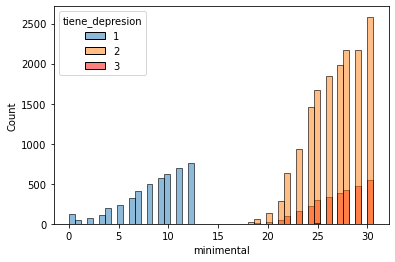

In [ ]:
sns.histplot(data= df, x ='minimental', hue='tiene_depresion',  palette=["C0", "C1", "r"], binwidth= 0.6)

<AxesSubplot:xlabel='minimental', ylabel='Count'>

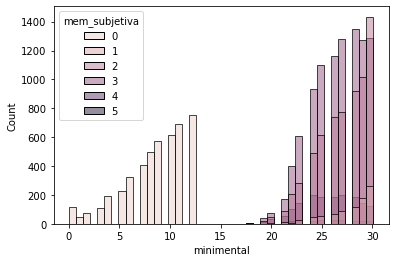

In [ ]:
sns.histplot(data= df, x ='minimental', hue='mem_subjetiva', binwidth= 0.7)

In [ ]:
assert(False)

AssertionError: 

In [ ]:
#Verificar columnas con valores 9/99 u 8/98 que corresponden con no sabe o no responde
ns_nresponde = []
ns_nr_98_99= []


for col in df.columns:
    if 9 and 8 in df[col].values:
        ns_nresponde.append(col)
    if 98 and 99 in df[col].values:
        ns_nr_98_99.append(col)

In [ ]:
#Crear diccionario con valores que representan respuestas nulas (No sabe no responde)
dic_columnas = {}
for col in ns_nresponde:
    if col == 'minimental':
        continue
    dic_columnas[col] = [9,8]
for col in ns_nr_98_99:
    if col == 'edad' or col =='circunferencia_cintura' or col == 'peso':
        continue
    else:
        dic_columnas[col] = [98,99]

In [ ]:
cols_cero = ['grupo_etnico', 'raza','sexualidad', 'posesion_vivienda', 'tipo_de_trabajo', 'ingresos', 'suficiencia_recursos', 'satisfaccion_ingresos','fuente_de_agua','alimentacion', 'comidas_al_dia', 'lacteos', 'granos', 'carne', 'frutas_verduras', 'mem_subjetiva', 'problemas_memoria', 'comparacion_memoria', 'economia_familiar','salud_adolescencia','hambre_adolescencia', 'violencia_adolescencia', 'percepcion_salud', 'vision', 'rechazo_infancia', 'abuso_gritos', 'abuso_maltrato_fisico', 'abuso_agresion', 'abandono', 'abuso_economico', 'artrosis','salud_30_dias','religion','tipo_vivienda']

In [ ]:
for col in cols_cero:
    if col not in dic_columnas:
        dic_columnas[col] = []
    dic_columnas[col].append(0)
        

In [ ]:
#Columna vision 7 es valor nulo, se remplaza por 9 para que sea eliminado en el futuro
df['vision'].replace(7,9, inplace=True)

In [ ]:
len(df)

23694

In [ ]:
# Eliminar respuesta #9 de la columna lee libros
indexes = df[df['lee_libros']==9].index
df['lee_libros'].drop(indexes, axis=0, inplace = True)

In [ ]:
df['lee_libros'].value_counts()

1    12985
9     5682
2     5027
Name: lee_libros, dtype: int64

In [ ]:
df_depresion = df.query('tiene_depresion == 1')#personas sin depresion

In [ ]:
len(df_depresion)

4705

In [ ]:
dic_columnas

{'num_personas_hogar': [9, 8],
 'afiliacion_pension': [9, 8],
 'afiliacion_salud': [9, 8],
 'grupo_etnico': [9, 8, 0],
 'raza': [9, 8, 0],
 'sabe_leer': [9, 8],
 'sabe_escribir': [9, 8],
 'a_educacion': [98, 99],
 'nivel_educativo': [98, 99],
 'edad_primer_trabajo': [98, 99],
 'tipo_de_trabajo': [98, 99, 0],
 'ingresos': [9, 8, 0],
 'suficiencia_recursos': [9, 8, 0],
 'satisfaccion_ingresos': [9, 8, 0],
 'posesion_vivienda': [9, 8, 0],
 'habitacion_unica': [9, 8],
 'utiliza_computador': [9, 8],
 'utiliza_internet': [9, 8],
 'fuente_de_agua': [98, 99, 0],
 'medio_transporte': [98, 99],
 'religion': [9, 8, 0],
 'sentirse_viejo': [9, 8],
 'escribe': [9, 8],
 'resuelve_matematica': [9, 8],
 'pasatiempos': [9, 8],
 'escuchar_radio': [9, 8],
 'ver_television': [9, 8],
 'juegos_de_mesa': [9, 8],
 'manualidades': [9, 8],
 'hablar_con_familiares': [9, 8],
 'visitar_familiares': [9, 8],
 'actividad_fisica': [9, 8],
 'navegar_internet': [9, 8],
 'asistir_cursos': [9, 8],
 'hobbies': [9, 8],
 'com

In [ ]:
#Se verifican las columnas que más contribuyen a la eliminación de entradas donde test_depresion = 1 (Dónde las personas son sanas)
dictionary = {}
indexes = []

for col, value in dic_columnas.items():
    rows = df_depresion[(df_depresion[col].isin(value))].index
    indexes.extend(rows)
    dictionary[col] = len(rows)

to_print = sorted([(key, val) for key, val in dictionary.items()], key=lambda x:x[1], reverse=True)
for i in to_print:
    print(f"{i[0]}:{i[1]}")

frutas_verduras:4702
suficiencia_recursos:4701
economia_familiar:4701
religion:4692
sexualidad:4691
grupo_etnico:4690
raza:4690
satisfaccion_ingresos:4690
alimentacion:4690
comidas_al_dia:4690
lacteos:4690
granos:4690
carne:4690
mem_subjetiva:4690
problemas_memoria:4690
comparacion_memoria:4690
salud_adolescencia:4690
hambre_adolescencia:4690
violencia_adolescencia:4690
percepcion_salud:4690
vision:4690
rechazo_infancia:4690
abuso_gritos:4690
abuso_maltrato_fisico:4690
abuso_agresion:4690
abandono:4690
abuso_economico:4690
navegar_internet:4338
salud_30_dias:3082
escribe:2503
resuelve_matematica:2500
pasatiempos:2499
ingresos:1086
tipo_de_trabajo:871
posesion_vivienda:749
asistir_cursos:302
num_personas_hogar:189
juegos_de_mesa:149
bibliotecas_museos:144
ver_television:121
manualidades:120
edad_primer_trabajo:119
escuchar_radio:108
a_educacion:94
fuente_de_agua:81
hobbies:81
actividad_fisica:77
tipo_vivienda:74
hablar_con_familiares:62
nivel_educativo:58
eventos_cult_dep:55
ayuda:48
vo

In [ ]:
#Borrar filas con valores no sabe/no responde
indexes = []
to_detele = []
dictionary = {}
threshold = 3000
for col, value in dic_columnas.items():
    rows = df[(df[col].isin(value))].index
    dictionary[col] = len(rows)

for key,value in dictionary.items():
    if value >= threshold:
        print(f'columnas eliminadas por tener más de 5 mil no sabe/no responde {key, value}')
        df.drop(key, inplace= True, axis = 1)

for col, value in dic_columnas.items():
    if col in df.columns:
        rows = df[(df[col].isin(value))].index
        indexes.extend(rows)
        
for i in indexes:
    if i not in to_detele:
        to_detele.append(i)
        
df.drop(to_detele, axis = 0, inplace=True)

print(dictionary)


columnas eliminadas por tener más de 5 mil no sabe/no responde ('grupo_etnico', 5855)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('raza', 5554)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('tipo_de_trabajo', 3085)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('ingresos', 4091)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('suficiencia_recursos', 4822)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('satisfaccion_ingresos', 4788)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('posesion_vivienda', 3327)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('religion', 4818)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('escribe', 5698)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('resuelve_matematica', 5696)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('pasatiempos', 5701)
columnas eliminadas por tener más de 5 mil n

In [ ]:
df['tiene_depresion'].value_counts()

2    13234
1     3486
3     2560
Name: tiene_depresion, dtype: int64

In [ ]:
#Unificar resultados para columnas con opcion si/no
yes_no = []
for col in df.columns:
    if len(df[col].unique()) == 2:
        yes_no.append(col)

In [ ]:
yes_no

['area_vivienda',
 'sexo',
 'sabe_leer',
 'sabe_escribir',
 'dependencia_economica',
 'habitacion_unica',
 'utiliza_computador',
 'utiliza_internet',
 'escuchar_radio',
 'ver_television',
 'juegos_de_mesa',
 'manualidades',
 'hablar_con_familiares',
 'visitar_familiares',
 'actividad_fisica',
 'asistir_cursos',
 'hobbies',
 'compras',
 'bibliotecas_museos',
 'eventos_cult_dep',
 'viajar',
 'participa_grupos',
 'beneficiario_alimentacion',
 'beneficiario_col_mayor',
 'desplazado',
 'ejercicio',
 'caminar',
 'problemas_auditivos',
 'hipertension',
 'diabetes',
 'cancer',
 'asma',
 'enfermedad_cardiaca',
 'derrame_cerebral',
 'artrosis',
 'osteoporosis',
 'enfermedad_mental',
 'hospitalizacion',
 'ayuda',
 'voluntario']

In [ ]:
# Columnas con opcion 1(si)/2(no) son unificadas a la convención 1(si)/0(no)
for col in yes_no:
    if col == 'sexo' or col == 'area_vivienda':
        continue
    elif 2 in df[col]:
        df[col].replace(2,0, inplace=True)
        

In [ ]:
#cambiar entradas de columna color de piel a numericas
df['color_piel'].replace({'claro':0,'medio':1, 'oscuro':2}, inplace=True)

In [ ]:
len(df)

19280

In [ ]:
df['ha_trabajado'].value_counts()

1    16907
2     2372
9        1
Name: ha_trabajado, dtype: int64

In [ ]:
df.query('ha_trabajado == 9').index

Int64Index([587], dtype='int64')

In [ ]:
df.drop(index=587, axis=0, inplace=True)

In [ ]:
df.columns

Index(['area_vivienda', 'estrato', 'sexo', 'edad', 'estado_civil',
       'num_personas_hogar', 'afiliacion_pension', 'afiliacion_salud',
       'sabe_leer', 'sabe_escribir', 'a_educacion', 'nivel_educativo',
       'ha_trabajado', 'edad_primer_trabajo', 'dependencia_economica',
       'tipo_vivienda', 'habitacion_unica', 'utiliza_computador',
       'utiliza_internet', 'fuente_de_agua', 'medio_transporte',
       'sentirse_viejo', 'lee_libros', 'escuchar_radio', 'ver_television',
       'juegos_de_mesa', 'manualidades', 'hablar_con_familiares',
       'visitar_familiares', 'actividad_fisica', 'asistir_cursos', 'hobbies',
       'compras', 'bibliotecas_museos', 'eventos_cult_dep', 'viajar',
       'participa_grupos', 'beneficiario_alimentacion',
       'beneficiario_col_mayor', 'desplazado', 'consumo_alcohol',
       'consumo_cigarrillo', 'ejercicio', 'caminar', 'problemas_auditivos',
       'hipertension', 'diabetes', 'cancer', 'asma', 'enfermedad_cardiaca',
       'derrame_cerebral',

In [ ]:
df.to_csv('cleaned_sabe_depresion.csv', index=False, header=True)